#### DTU - 02805 Social graphs and interactions (2020) - Assignment B

## 2020 US Representatives and Senators Twitter Analysis

#### by Electra Zarafeta (s202238), Asterios Nastas (s202242),  Idriss El Quassimi (s)



## 0. 3 minute movie

This is the 

<iframe width="800" height="400" src="https://www.youtube.com/embed/mGeYpSRlDVg" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## 1. Motivation

The aim of this analysis is to investigate the interactions between congress members of both the Republican and Democrat parties on Twitter, which is a social media that politicians use quite a lot to dicsuss, present their opinions and influence their followers. We will be able to understand how the two parties use twitter in order to promote their political work, we will gain insights regarding the political rally and investigate the main issues discussed during the elections. Do they focus on citizens' problems? How influential are they? Are they strong members of any community? How do they interbehave towards other congressmen, are they supporting their political allies, criticizing the other side or following their leader? We believe that it will be very interesting to analyze the above from a data scientist's prespective.

### 1.1 The dataset

The dataset we used contains the US House Representatives and Senators of 2020, their party, their Twitter account, the state and their Tweets in a specific period of time (including US election). We choose the data of the US congress because US is considered the most influential country in the world. In order to download the dataset we used the list of the congress people \[1] [from this site](https://triagecancer.org/congressional-social-media) and based on that we used the Twitter API to download all the required data, like Tweets, in which we will apply some of the tools used throughout the course.

### 1.2 Our vision

To get more insight into the state of the Congress during the 2020 and analyse the two sides of the Congress, *Democrats vs Republicans*, we chose to scrap each individuals tweets.
Thinking about it, Twitter, is the perfect platform to search more into it. People there, due to the Twitter's nature of *280 characters limit*, are forced
actually to **express their thoughts shortly** (without any extra words, politicians seem to love apparently). This is even more convenient, because with *Natural Language Processing*
analysis we hope to classificate better the way Democrats and Republicans use Twitter to influence and depict key topics of areas they specifically infrom the public about.
Also, 

### 1.3 Our goal 


Our goal is to depict any differences between the US 2020 Representatives and Senators. By finding and analysing the political presence of the Congress on Twitter, we 
hope to get **core values that distinguish the Democrat from the Republican**, find the most influential people on the Congress and find any common patterns on the way politicians talk on the Internet. 
A particular intresting scenario would be to identify keywords based on the most influential people. We also want to understand whether the most influencial Democrats and Republicans share the type certain keywords when they want to
be the most infuential (like in case when they type somehting controversial for the sake of popularity and influence) they can be? (to be continued.. ) 


## 2. Basic Stats

This section includes information about cleaning and preprocessing of the data as well as a short section exploring the basic implemented stats of the datasets.

### 2.0 Load Modules

Firstly, each needed module is loaded.

In [ ]:
!pip3 install nltk

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip3 install wordcloud

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip3 install seaborn

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip3 install networkx

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip3 install fa2

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip3 install python-louvain

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip3 install prettytable

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import string
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import operator
import pandas as pd
import regex as re
import seaborn as sns
import networkx as nx
from fa2 import ForceAtlas2
import community
from community import community_louvain
import prettytable
import math



lemmatizer = WordNetLemmatizer()  # assign the lemmatization function to a variable
pun = string.punctuation  # assign to a string all sets of punctuation
stops = nltk.corpus.stopwords.words('english')  # assign the list of english stop words (commonly used words)

### 2.1 Twitter Scrapping

The first step was to scrap the needed data with the use of Twitter API. More info on the Scrap process can be found on the following iPython Notebook:
https://nbviewer.jupyter.org/github/ElectraZarafeta/Social_Graphs/blob/master/Twitter%20Scrapping.ipynb.
All the extracted data were saved to a csv file, *Data.csv*, which can be found on the **data** folder.

### 2.2 Data cleaning and preprocessing

In [ ]:
# load data from csv
Data = pd.read_csv('./data/Data.csv')
# print some of the data 
Data.sample(n=10)

Party                 Name                         State  \
126    Democrat        Frankel, Lois         Florida 21st District   
15     Democrat      O'Halleran, Tom          Arizona 1st District   
459  Republican         Granger, Kay           Texas 12th District   
362  Republican            Budd, Ted  North Carolina 13th District   
188  Republican  Hollingsworth, Trey          Indiana 9th District   
129    Democrat    Wilson, Frederica         Florida 24th District   
111  Republican       Waltz, Michael          Florida 6th District   
201  Republican           Paul, Rand                      Kentucky   
52     Democrat              Cox, TJ      California 21st District   
310    Democrat      Malinowski, Tom       New Jersey 7th District   

                 Chamber TwitterUsernames  \
126  U.S. Representative   RepLoisFrankel   
15   U.S. Representative     TomOHalleran   
459  U.S. Representative    RepKayGranger   
362  U.S. Representative  BuddforCongress   
188  U.S. Representative      VoteForTrey   
129  U.S. Representative        RepWilson   
111  U.S. Representative  RepMichaelWaltz   
201         U.S. Senator         RandPaul   
52   U.S. Representative         RepTJCox   
310  U.S. Representative    RepMalinowski   

                                                Tweets  
126  #COVID19 is wiping out a decade of progress ag...  
15   Dr. Jim will be an important member of the Pre...  
459  My colleagues in Congress and I continue to re...  
362  Today is #SmallBusinessSaturday \n\nSupporting...  
188  RT @indgop: Congratulations on your re-electio...  
129  President-elect Bidenʼs economic team will bri...  
111  Weekly reminder that $138 BILLION in #PPP fund...  
201  Let’s see if Big Tech censors a mainstream new...  
52   Millions of Americans are impacted by diabetes...  
310  The COVID-19 testing site at Kean University h...

In order to fetch for each representative/ senator the mentioned or retweeted accounts, we use the following regex:   
`\s([@][\w_-]+)`. This returns the `@twittername`. So our graph will have as nodes the Representatives/ Senators who have Twitter account and as edges the Tweets (mentions/ retweets).

In [ ]:
# Create Directed Graph based on mentions and retweets
def directed_graph(Data):
    # regex for mentions/ retweets
    regex_mentions_retweets = "\s([@][\w_-]+)"

    G = nx.DiGraph()

    for i in range(len(Data)): # loop through the representatives/ senators
        name = Data["TwitterUsernames"][i] 
        G.add_node(name, Party=Data["Party"][i], Tweets=Data["Tweets"][i])  # new entry of representative/ senator in the graph
        usernames_before = re.findall(regex_mentions_retweets, Data["Tweets"][i]) # list of mentioned/ retweeted accounts

        for username in usernames_before:
            username = username.strip().split('@')[1] # remove @ symbol

            if (username in Data["TwitterUsernames"].values) and (username != name):  # check if account is in the representatives/ senators list
                G.add_edge(name, username)

    return G

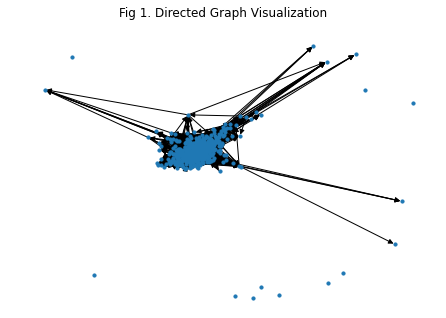

In [ ]:
G = directed_graph(Data) # call function for directed graph generation

# draw directed graph
plt.figure()
nx.draw(G, node_size=10)
plt.title("Fig 1. Directed Graph Visualization")
plt.show()

Based on the specific graph it's not possble to extract any valuable information, so we will continue with some further analysis and more useful tools will be presented.

### 2.3 Basic stats

We will continue with some basic information extracted from our Data which will be useful for the rest of the analysis.

In [ ]:
# Create Giant Connected Component - GCC
def giant_connected_component(G):
    largest_cc = max(nx.weakly_connected_components(G), key=len)
    GCC = G.subgraph(largest_cc)

    print("There are {} links in the GCC network.".format(GCC.number_of_edges()))
    print("There are {} nodes in the GCC network.".format(GCC.number_of_nodes()))

    between_representatives = 0

    for edge in GCC.edges:
        if GCC.nodes[edge[0]]['Party'] != GCC.nodes[edge[1]]['Party']:
            between_representatives += 1

    print(f'Number of links between the representatives/ senators of different party: {between_representatives}')
    print(f'Percentage of links between the representatives/ senators of different party: {round(between_representatives / GCC.number_of_edges() * 100, 1)} %')

    return GCC

GCC = giant_connected_component(G)

There are 4947 links in the GCC network.
There are 526 nodes in the GCC network.
Number of links between the representatives/ senators of different party: 890
Percentage of links between the representatives/ senators of different party: 18.0 %


As we can see the total number of links in our network is 4947 and the total number of nodes is 527 representatives/ senators. Also, it is worth mentioning that there are 890 connections (18%) between the Republicans and Democrats and, therefore, we understand that it is frequent the two parties' representatives to interact through Twitter. We can assume that they mostly critisize their political competitors.

In [ ]:
def in_out_deg(G):
    in_deg = []
    for i in G.nodes:
        in_deg.append(G.in_degree(i))

    index_max_in = sorted(range(len(in_deg)), reverse=True, key=lambda k: in_deg[k])

    node_names = []
    for i in G.nodes:
        node_names.append(i)

    index_max_in = index_max_in[0:5]

    print('The 5 most connected in-degree representatives/ senators are:')

    for i in range(len(index_max_in)):
        index = index_max_in[i]
        print(node_names[index])

    out_deg = []
    for i in G.nodes:
        out_deg.append(G.out_degree(i))

    index_max_out = sorted(range(len(out_deg)), reverse=True, key=lambda k: out_deg[k])

    index_max_out = index_max_out[0:5]

    print('\nThe 5 most connected out-degree representatives/ senators are:')

    for i in range(len(index_max_out)):
        index = index_max_out[i]
        print(node_names[index])

    #return in_deg, out_deg


in_out_deg(GCC)

The 5 most connected in-degree representatives/ senators are:
SpeakerPelosi
GOPLeader
SteveScalise
KamalaHarris
SenSchumer

The 5 most connected out-degree representatives/ senators are:
SteveScalise
RepBradWenstrup
RepGuthrie
RepBonnie
RepRashida


Some of the most mentioned and retweeted representatives/ senators are *Nancy Pelosi*, *Kevin McCarthy*, *Steve Scalise*, *Kamala Harris* and *Chuck Schumer*. *Nancy Pelosi* and *Kevin McCarthy* are the leaders of the Democratic and Republican party correspondigly and therefore it is reasonable that they are on the top of the most mentioned/ retweeted accounts, their followers prefer to post based on their words. \[2] Also, the representatives/ senators that retweet or mention other congrees members mostly are: *Steve Scalise*, *Brad Wenstrup*, *S. Brett Guthrie*, *Bonnie Watson Coleman* and *Rashida Tlaib*.  

Let's take a look on the distribution of the in and out degree.

Maximum in-degree in network:  126
Minimum in-degree in network:  0


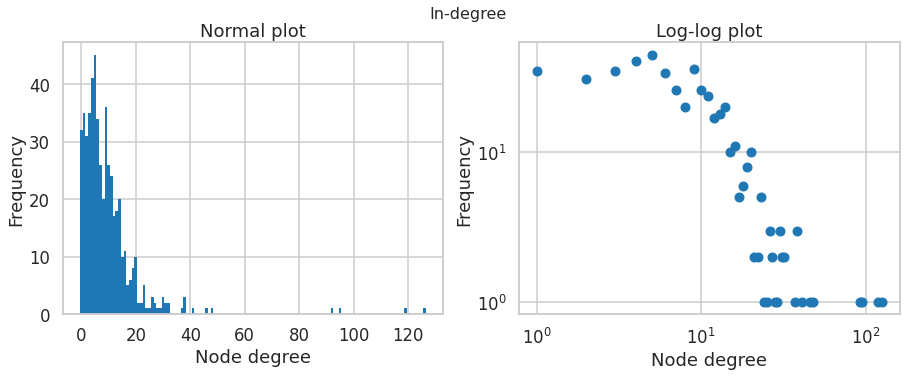

Maximum out-degree in network:  39
Minimum out-degree in network:  0


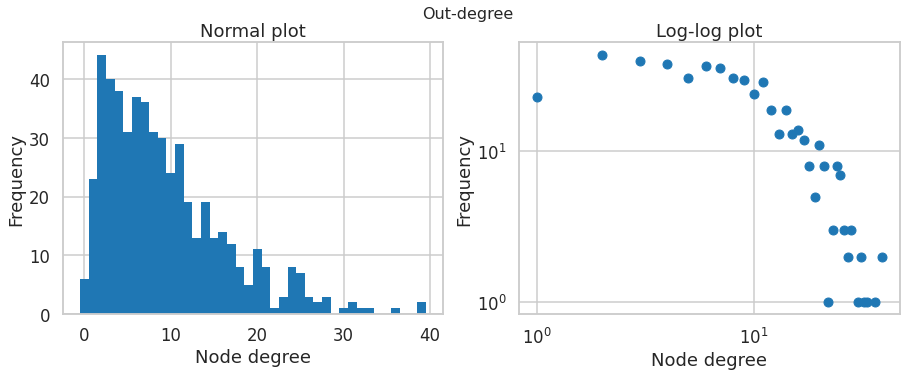

In [ ]:
 def distribution(GCC):
    plt.rcParams["patch.force_edgecolor"] = False

    # In degree
    in_degree = sorted([d for n, d in GCC.in_degree()], reverse=False)
    dmax = max(in_degree)
    dmin = min(in_degree)

    print('Maximum in-degree in network: ', dmax)
    print('Minimum in-degree in network: ', dmin)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15,5])
    fig.suptitle('In-degree', fontsize = 16)

    counts, bins = np.histogram(in_degree, bins = np.arange(dmin-0.5, dmax+1.5,1))
    ax1.hist(in_degree, bins = bins)
    ax1.set_xlabel('Node degree')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Normal plot')

    ax2.loglog(np.arange(dmin, dmax+1,1), counts, 'o')
    ax2.set_xlabel('Node degree')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Log-log plot')
    plt.show()

    # Out degree
    out_degree = sorted([d for n, d in GCC.out_degree()], reverse=False)
    dmax = max(out_degree)
    dmin = min(out_degree)

    print('Maximum out-degree in network: ', dmax)
    print('Minimum out-degree in network: ', dmin)


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15,5])
    fig.suptitle('Out-degree', fontsize = 16)

    counts, bins = np.histogram(out_degree, bins = np.arange(dmin-0.5, dmax+1.5,1))
    ax1.hist(out_degree, bins = bins)
    ax1.set_xlabel('Node degree')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Normal plot')

    ax2.loglog(np.arange(dmin, dmax+1,1), counts, 'o')
    ax2.set_xlabel('Node degree')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Log-log plot')
    plt.show()

    return in_degree, out_degree


in_degree, out_degree = distribution(GCC)

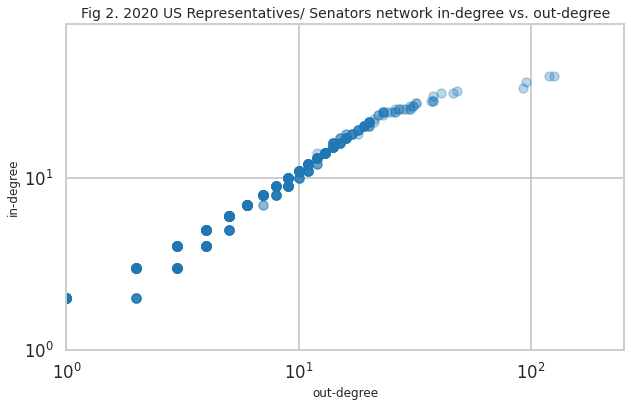

Correlation coefficient is: 0.8586150792739127


In [ ]:
fig, ax = plt.subplots()

ax.set_title("Fig 2. 2020 US Representatives/ Senators network in-degree vs. out-degree", fontsize=14)
ax.set_xlabel("out-degree", fontsize=12)
ax.set_ylabel("in-degree", fontsize=12)

ax.grid(True, linestyle='-', color='0.75')
ax.set_xlim([1, max(in_degree) * 2])
ax.set_ylim([1, max(out_degree) * 2])
ax.set_xscale('log')
ax.set_yscale('log')

plt.scatter(in_degree, out_degree, alpha=0.3)

plt.show()

print('Correlation coefficient is: {0}'.format(
    np.corrcoef(
        x=out_degree, y=in_degree)[0, 1]))

Continuing with the *degree distribution*, as we can see on the above figures there is no big difference on the frequencies of in and out degree. The in-dregree reachs up to 126, while the out-degree goes from 0 to 39. Generally, the frequency is quite low which is expected given the *network's nature*. It is reasonable that a big amount of the tweets will not contain mentions or retweets, but just plain text. Social media networks usually have a power low distribution and most accounts do not have that many interactions.  
Regarding the *correlation coefficient* between in and out-degree we can clearly see that nodes with high in-degree tends to have a high out-degree aswell.   

Also, we thought that it would be interesting to investigate which party tweets (mentions/ retweets) the most.

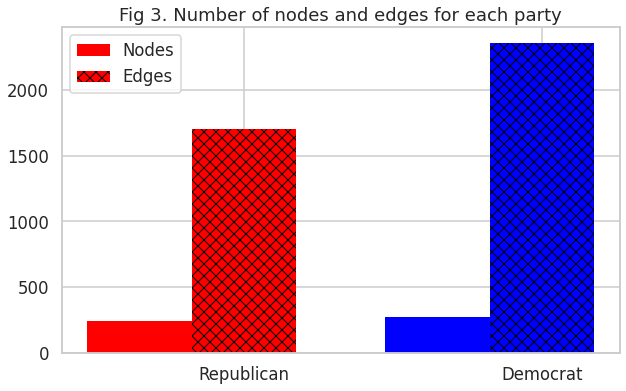

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]

fig, ax = plt.subplots()

sizes_nodes = [len([x for x,y in GCC.nodes(data=True) if y['Party']=="Republican"]), len([x for x,y in GCC.nodes(data=True) if y['Party']=="Democrat"])]
sizes_edges = [len([edge for edge in GCC.edges if GCC.nodes[edge[0]]['Party'] == "Republican" and GCC.nodes[edge[1]]['Party'] == "Republican"]), len([edge for edge in GCC.edges if GCC.nodes[edge[0]]['Party'] == "Democrat" and GCC.nodes[edge[1]]['Party'] == "Democrat"])]

ind = np.arange(len(sizes_nodes))
width = 0.35
colors = ['red', 'blue']

rects1 = ax.bar(ind, sizes_nodes, width, color = colors)
rects2 = ax.bar(ind+width, sizes_edges, width, color = colors, hatch=r"//\\")

ax.legend((rects1[0], rects2[0]), ("Nodes", "Edges"))

ax.set_xticks(ind+width)
ax.set_xticklabels(["Republican", "Democrat"])
plt.title("Fig 3. Number of nodes and edges for each party")
plt.show()

Based on the above figure we can see that even the number of representatives/ senators each party has is almost equally. As we already know the elected Democrats representatives and senators for 2020 were 280 and the Republicans were 247 \[3], \[4]. We can see that all of the congess members use Twitter, this proves the power that Twitter has in the US politics.   
Regarding the interaction between the congess members, based on the above figure the Democrats connect, communicate and interact with each other much more rather than the Republicans do. 

Finally, in our `Basic stats` analysis we will present our network in a coloured graph and we will see how their interactions and communications can be visualized.

In [ ]:
# create the undirected graph
GU = GCC.to_undirected()

100%|██████████| 4000/4000 [00:06<00:00, 658.33it/s]
BarnesHut Approximation  took  4.05  seconds
Repulsion forces  took  0.10  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  0.84  seconds
AdjustSpeedAndApplyForces step  took  0.48  seconds


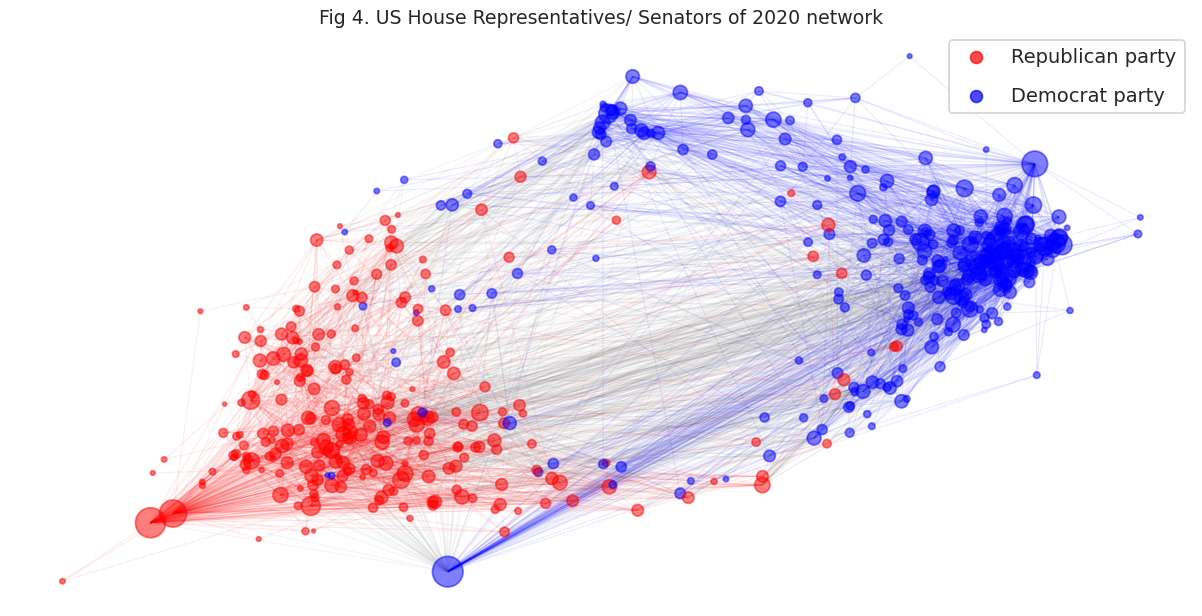

In [ ]:
def forceatlas_graph(GU):
    # Color nodes according to party
    colors = []
    for n in list(GU.nodes(data="Party")):
        if 'Republican' in n:
            colors.append('red')
        else:
            colors.append('blue')

            # Scale node-size according to degree
    d = nx.degree(GU)
    sizes = [(d[node] + 1) * 5 for node in GU.nodes()]

    # Color edges according to between-party or not
    edge_colors = []
    for edge in GU.edges:
        if GU.nodes[edge[0]]['Party'] != GU.nodes[edge[1]]['Party']:
            edge_colors.append('grey')
        else:
            if GU.nodes[edge[0]]['Party'] == 'Republican':
                edge_colors.append('red')
            else:
                edge_colors.append('blue')

    # Specify the settings for the Force Atlas 2 algorithm
    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        linLogMode=False,  # NOT IMPLEMENTED
        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
        edgeWeightInfluence=7.0,

        # Performance
        jitterTolerance=0.5,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=40,
        multiThreaded=False,  # NOT IMPLEMENTED

        # Tuning
        scalingRatio=0.5,
        strongGravityMode=False,
        gravity=0,

        # Log
        verbose=True)

    positions = forceatlas2.forceatlas2_networkx_layout(GU, pos=None, iterations=4000)

    plt.figure(num=None, figsize=(18, 9), dpi=85, facecolor='w', edgecolor='k')

    sns.set_style('whitegrid')
    sns.set_context('talk')

    # create legend
    plt.scatter([], [], c='red', alpha=0.7, s=100, label='Republican party')
    plt.scatter([], [], c='blue', alpha=0.7, s=100, label='Democrat party')
    plt.legend(scatterpoints=1, frameon=True, labelspacing=1)

    nx.draw_networkx_nodes(GU, positions, node_size=sizes, node_color=colors, alpha=0.5)
    nx.draw_networkx_edges(GU, positions, edge_color=edge_colors, alpha=0.08)
    ax = plt.gca()
    ax.collections[0].set_linewidth(0.1)
    ax.set_title('Fig 4. US House Representatives/ Senators of 2020 network', fontsize=16);
    plt.axis('off')
    plt.show()


forceatlas_graph(GU)

So, this is the 2020 US Representatives/ Senators Network based on their interaction through Twitter. As we can see the *Democrat* part is quite more "noisy" and with `grey` we can see the interactions between the two parties.  
Let's analyze more our data and delve deeper. 

## 3. Tools, Theory and Analysis

Since we have extracted our data and we did a preliminary analysis, we will use several different tools and explore their impact to our network. 

### 3.1 TF-TR Wordclouds

We considered interesting to look into the most common used words in the text of each party and present them in *Word Cloud*, which provides a very nice visualization. To find the most common words we will use their TF-TR value, since we want to extract the values for one text-party each time. There were several steps that were required before implementing the Word Cloud for each party.  
* First of all, we have to create a different string for each party with all the Tweets of their representatives/ senators. `full_republican_text`, `full_democrat_text`.
* Afterwards, we move on with the preprocess and cleaning of each string. The preprocess/ cleaning consists of:
    1. Tokenization,
    2. Setting all the words to lower case,
    3. Removing the words that contain the retweeted/ mentioned accounts, *@accountname*,
    4. Removing the words that contain any of the listed punctuations, `string.punctuantion`, 
    5. Removing the english stop words - the most common english words used, `nltk.corpus.stopwords.words('english')`, 
    6. Lemmatization (keeps the lemma of each word)
* Then, we apply TF-TR for each list of tokens, *Republicans* and *Democrats*. TF-TR consists of two parts, the *term frequency (TF)* and the *term ratio (TR)*.
    1. The term frequency (TF) is computed for each word in each of the two lists, `nltk.FreqDist`, and returns the number of times a word occurs in a text. On the result of TF we expect to get similar or the same words in both texts. This is why we use the TR values as well.
    2. The term ration (TR) is like a weight for each token, which distinguishes the unique words of each party. In general, the words appearing in the other party have a lower ratio than the ones only appearing in its own party. The definition of TR is the following:  
            $ w_{\text{word}} ^{\text{party}} = \dfrac{TF_{\text{word}} ^{\text{party}}}{TF_{\text{word}} ^{\text{other party}} + c} $  
            $ c $ is used to avoid potential division with 0 and more specifically we used $ c=0.1$.
    3. So, the final TF-TR value of a word is computed by multiplying TF and TR of it. 
* Finally, before applying the Word Clouds, based on the computed TF-TR values, we create a final text for each party which is consisted of all the unique tokens repeated according to the TF-TR values (rounded up to the nearest integer).  


Below, all the required steps were implemented and the received results were commented.


In [ ]:
# text preprocessing and cleaning
def clean_text(text):
    cleaned_text = []

    words = text.split(' ')  # returns a tokenized copy of each line
    words = [w.lower() for w in words]  # all characters are set to lower case
    words = [word for word in words if not word.startswith("@")]
    words = [word for word in words if
             not word in pun]  # keep only the words which don't contain any of the listed punctuations
    words = [word for word in words if word.isalpha()]  # keep the words which contain only alphabet letters
    words = [w for w in words if not w in stops]  # removes the english stop words
    words = [w for w in words if not len(w) == 1]  # removes the words which have length equal to 1
    for word in words:  # loop through the list of words
        word = lemmatizer.lemmatize(word)  # return the lemma of each word
        cleaned_text.append(word)  # write each word to the cleaned republican-file

    return cleaned_text

In [ ]:
# tf-tr computation based on its definition
def tftr(text_rep, text_dem):

    fdist_republican = nltk.FreqDist(text_rep)
    fdist_democrat = nltk.FreqDist(text_dem)

    print('\nThe 5 most common words (Frequency Distribution) in the Republicans text:')
    pt = prettytable.PrettyTable(['Words', 'Counts'])
    pt.align['Words'] = 'l'
    pt.align['Counts'] = 'r'
    for row in fdist_republican.most_common(5):
        pt.add_row(row)
    print(pt)

    print('\nThe 5 most common words (Frequency Distribution) in the Democrats text:')
    pt = prettytable.PrettyTable(['Words', 'Counts'])
    pt.align['Words'] = 'l'
    pt.align['Counts'] = 'r'
    for row in fdist_democrat.most_common(5):
        pt.add_row(row)
    print(pt)

    # TF-TR computation for Republican Party

    tftr_republican = []  # create a list which will contain the TF-TR results for the republican party

    for token in fdist_republican:  # loop through each token in term frequency
        tr = fdist_republican[token] / (
                fdist_democrat[token] + 0.1)  # compute the term ratios based on the above equation
        tftr = fdist_republican[token] * tr  # multiply TF and TR of each token to compute TR-TR
        tftr_republican.append([token, int(
            round(tftr))])  # assign the result of each token in the list (rounded up to the nearest integer value)

    tftr_republican = sorted(tftr_republican, key=operator.itemgetter(1),
                             reverse=True)  # descending sort the list based on the TF-TR value

    print("\nThe 10 tokens in Republican party with the highest TF-TR value:")
    pt = prettytable.PrettyTable(['Words', 'TF-TR value'])
    pt.align['Words'] = 'l'
    pt.align['Counts'] = 'r'
    for row in tftr_republican[:10]:
        pt.add_row(row)
    print(pt)

    # TF-TR computation for Democrat Party

    tftr_democrat = []  # create a list which will contain the TF-TR results for the democrat party

    for token in fdist_democrat:  # loop through each token in term frequency
        tr = fdist_democrat[token] / (
                fdist_republican[token] + 0.1)  # compute the term ratios based on the above equation
        tftr = fdist_democrat[token] * tr  # multiply TF and TR of each token to compute TR-TR
        tftr_democrat.append([token, int(
            round(tftr))])  # assign the result of each token in the list (rounded up to the nearest integer value)

    tftr_democrat = sorted(tftr_democrat, key=operator.itemgetter(1),
                           reverse=True)  # descending sort the list based on the TF-TR value

    print("\nThe 10 tokens in Democrat party with the highest TF-TR value:")
    pt = prettytable.PrettyTable(['Words', 'TF-TR value'])
    pt.align['Words'] = 'l'
    pt.align['Counts'] = 'r'
    for row in tftr_democrat[:10]:
        pt.add_row(row)
    print(pt)

    return tftr_republican, tftr_democrat

In [ ]:
# full text generator based on TF-TR values
def string_gen(tftr):
    full_string = ''

    for t in tftr:  # loop through the TF-TR list values
        full_string = full_string + ((t[0] + ' ') * t[1])  # add to the string the repeated tokens

    return full_string

In [ ]:
# word clouds generator
def wordclouds_gen(fulltxt, party):
    if party == "republican":
        mask = np.array(Image.open("./data/republican.png"))
        title = "Fig 5. Word-cloud for the Republican Party"
        color = 'darkred'
    elif party == "democrat":
        mask = np.array(Image.open("./data/democrat.png"))
        title = "Fig 6. Word-cloud for the Democrat Party"
        color = 'darkblue'

    wc = WordCloud(background_color="white", mask=mask, contour_width=3, contour_color=color,
                              max_font_size=1500, collocations=False)

    wc.generate(fulltxt)

    image_colors = ImageColorGenerator(mask)

    fig = plt.figure(figsize=(10, 6), dpi=70)

    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()

In [ ]:
full_republican_text = ' '.join(Data[Data["Party"] == "Republican"]["Tweets"])
full_democrat_text = ' '.join(Data[Data["Party"] == "Democrat"]["Tweets"])

print(f'Length of full Republican text: {len(full_republican_text)}.')
print(f'Length of full Democrats text: {len(full_democrat_text)}.')

cleaned_republican_text = clean_text(full_republican_text)
cleaned_democrat_text = clean_text(full_democrat_text)

tftr_republican, tftr_democrat = tftr(cleaned_republican_text, cleaned_democrat_text)

string_rep = string_gen(tftr_republican)
string_dem = string_gen(tftr_democrat)



Length of full Republican text: 6491461.
Length of full Democrats text: 7433879.

The 5 most common words (Frequency Distribution) in the Republicans text:
+----------+--------+
| Words    | Counts |
+----------+--------+
| american |   2494 |
| great    |   1796 |
| today    |   1510 |
| day      |   1455 |
| new      |   1414 |
+----------+--------+

The 5 most common words (Frequency Distribution) in the Democrats text:
+----------+--------+
| Words    | Counts |
+----------+--------+
| american |   2906 |
| trump    |   2473 |
| need     |   2458 |
| health   |   2236 |
| day      |   2187 |
+----------+--------+

The 10 tokens in Republican party with the highest TF-TR value:
+---------------+-------------+
| Words         | TF-TR value |
+---------------+-------------+
| socialist     |    72250    |
| arkansas      |    36000    |
| communist     |    34924    |
| lahood        |    32490    |
| lr            |    25000    |
| wyoming       |    18490    |
| schiff        |    1

Our assumptions regarding the TF results was correct, since there are words like, `american` and `day`, in both most common words lists. This is why the TR part, the weights, is very useful to extract the most frequently used words. On the TF-TR the difference between the two parties' text it is much more clear.

Let's take a look on the wordclouds of each party based on their TF-TR values and explore more details on the TF-TR implementation.

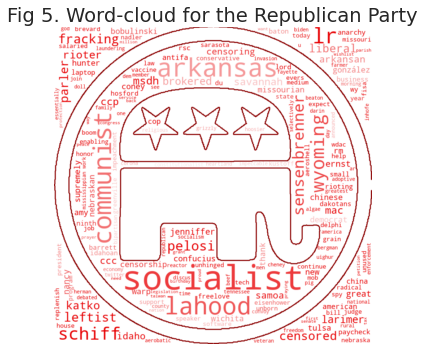

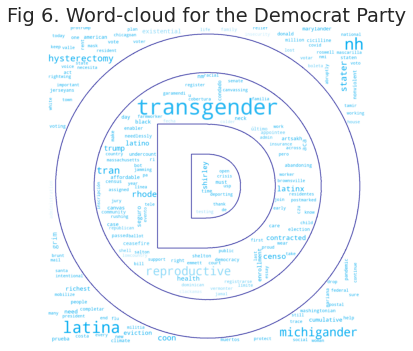

In [ ]:
wordclouds_gen(string_rep, party="republican")
wordclouds_gen(string_dem, party="democrat")

### 3.2 Communities and TF-IDF analysis

In order to extract meaningfull information from our network we need we are gonna investigate our network by dividing it in **different communities** from the Democrats and Republicans **Representators** and **Senators** . 
The different partitions (meaning the different communities) is going to be computed with the *Louvain method.* 
After computing the different communities by applying the Louvain method, we are going to keep the Representatives and Senators tweets (that belong to the same community) as a whole, in order to do the charectarization based on the TF-IDF. 

Our goal here is to find whether there are distinguishable differences between the different communities of the Democrats and the Republicans.

Before applying the Louvain method, let's briefly explain how the algorithm works:

1. We start by applying every individual node to it's own community.
2. Starting with the *$i^{th}$* node, the algorithms goal is the node to be merged with another neighbor node *$j^{th}$* only in order to optain and increase in modularity. If there is no increase in the modularity for the ith node, then the ith node doesn't "merge" with the jth node. This modularity calculation is happening for every i node in the network. This is the *first tteration.*
3. After the *first iteration* the algorithm runs again for every *$i^{th}$* node in the network. If there is no change in increasing of the modularity of each of the nodes in the network then algorithm terminates.
4. After successfuly applying the algorithm, the communities nodes are merged as a **hypernode** so the next part of the Louvain method can be carried out. 

The method used can be seen below:

In [ ]:
def communities(GU, party="None"):
    largest_cc = max(nx.connected_components(GU), key=len)
    G = GU.subgraph(largest_cc)

    partition = community_louvain.best_partition(G)

    if party == "rep":
        print("The total found communities for Republicans are: "+str(max(partition.values())+1) + " and their modularity is: "+ str(community.modularity(partition, G)))
    elif party == "dem":
        print("The total found communities for Democrats are: "+str(max(partition.values())+1) + " and their modularity is: "+ str(community.modularity(partition, G)))
    else:
        print("The total found communities for the full network are: "+str(max(partition.values())+1) + " and their modularity is: "+ str(community.modularity(partition, G)))

    return partition

In [ ]:
# Republican Graph
nodes = (
    node
    for node, data in GU.nodes(data=True)
    if data.get("Party") == "Republican"
)

largest_cc = max(nx.connected_components(nx.Graph(GU.subgraph(nodes))), key=len)
GU_Republican = GU.subgraph(largest_cc)



# Demograt Graph
nodes = (
    node
    for node, data in GU.nodes(data=True)
    if data.get("Party") == "Democrat"
)

largest_cc = max(nx.connected_components(nx.Graph(GU.subgraph(nodes))), key=len)
GU_Democrat = GU.subgraph(largest_cc)


partition_total = communities(GU)
partition_rep = communities(GU_Republican, party="rep")
partition_dem = communities(GU_Democrat, party="dem")

The total found communities for the full network are: 6 and their modularity is: 0.37912752303087793
The total found communities for Republicans are: 8 and their modularity is: 0.32430404391067735
The total found communities for Democrats are: 8 and their modularity is: 0.27023227071327116


As expected, the network of the US Representatives and Senator is a real network (scale-free characteristics), judging from a modularity of $Q=0.38 $ . But what does a modularity like this mean and why it's not $Q=1$, the ideal modularity of a random network? Let's dive more into it:

While, a modularity of $Q=1$ would be ideal, fact is that real networks like this is expected to the majority of nodes with a small node degree with only certain nodes called "hubs" have the highest degrees overall (scale-free characteristics). 
Thus, as our network resembles a real one, the modularity computed by the *Louvain algorithm* is not ideal (meaning $Q=1$) in any case and that is acceptable. 
Leading to the fact that our communities `Republicans` and `Democrats` cannot be split perfectly, as well, as they carry the scale-free characterics of parent network as well.

Now, let's find the **distribution of the Democrats and Republicans communities sizes** in *histograms*: 

In [ ]:
def communities_dict(partition):
    communitiesdict = {} #create a dictionary in which we will have for each community its size and its list of representatives
    count = [] #list with the size of the communities

    for val in set(partition.values()): #loop through the unique identified communities
        chars = [] #list with the representatives in each community
        for key in partition.keys(): #loop through all the representatives
            if partition[key] == val: #if the current community is the same as the representative's community we append it to the list 
                chars.append(key)
            
        count.append(len(chars)) #count the total number of representatives in each community - the community size
    
        communitiesdict[val] = len(chars), chars #assign to the dictionary the size and the different representatives in each community

    return communitiesdict, count

In [ ]:
def community_hist(count, party): 
    if party == "rep":
        color = "red"
        title = "Distribution of Republican's community sizes"
    elif party == "dem":
        color = "steelblue"
        title = "Distribution of Democrat's community sizes"
    plt.figure(figsize = (15,8))
    plt.hist(count, bins=13, width=2, color=color)
    plt.ylabel('Number of communities')
    plt.xlabel('Bins of community sizes')
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

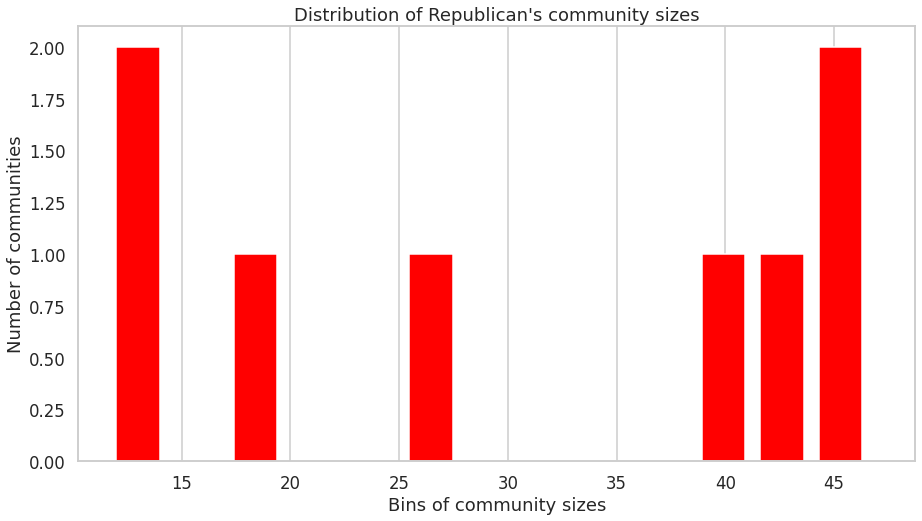

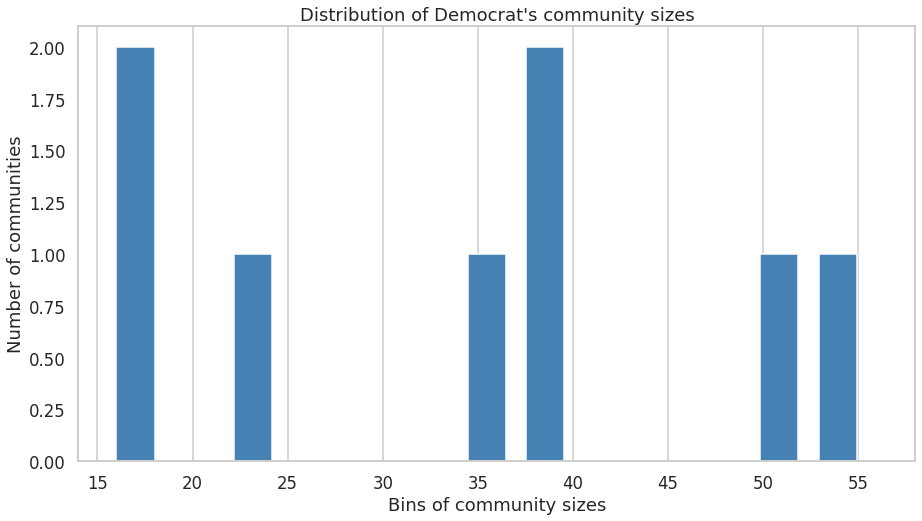

In [ ]:
communitiesdict_rep, count_rep = communities_dict(partition_rep)
communitiesdict_dem, count_dem = communities_dict(partition_dem)

community_hist(count_rep, party="rep")
community_hist(count_dem, party="dem")

Above we see a visual distribution (histogram) of the community sizes with the y-axis the number of communities with that total size (no more than 2). For both parties, the max community size is given around 40-50 Representatives and Senators. As our communities size is quite small (due to our nature of the data), on the code below we chose to work on the 4 largest communities out of the total depicted on the histogram above. Let's further analyse them:

In [ ]:
def largest_com(communities):
    communities_sorted = {k: v for k, v in sorted(communities.items(), key=lambda item: item[1], reverse=True)} #sort the dictionary based on the community size

    largestcom = {} #create dictionary for the largest communities
    c=0
    for key, value in communities_sorted.items(): #loop through the items in the sorted list
        if c < 4: #until we have filled the list with the items of the largest community 
            largestcom[key] = value
        c += 1

    return largestcom

Next, to define each community we will use the **Inverse Document Frequency method (TF-IDF)**. The Document Frequency method attaches a scoring number to words that are seen across 
the text many times but is rare in general across the whole input text.

The code below adds all Twitter text data from each community, to lower each character of the word. After that, we keep only the words that dont have an @ sign (from twitterAPI @RT symbolises the 'retweet' and @username, we don't need those words in our analysis). After that, we keep only the words which don't contain any of the listing punctuations and english stop words only to keep the lemma of the word stored.

Finally, we will compute the **Term-Frequency (TF)** for each token each community has. By using `nltk.FreqDist` we add the tokens that belong to that particular community, plus the term frequency of each token.

In [ ]:
def fdist_tokens(largest_com, Data):
    fdist_com  = [] #list with the frequency distribution (term frequency) - the frequency of each token within each community
    tokens_com = {} #dictionary with the unique tokens each community has
    all_tokens = [] #list with all the unique tokens from all the communities

    for key, value in largest_com.items(): #loop through the largest communities
        com_name = 'community_'+str(key) #assign to a variable the community name
        tokens = [] #list which will contain the tokens of each community
        tokens_com[com_name] = {}
        for rep in value[1]:
            words = (''.join(Data[Data['TwitterUsernames'] == rep]["Tweets"])).split(' ')
            words = [w.lower() for w in words] #all characters are set to lower case
            words = [word for word in words if not word.startswith("@")]
            words = [word for word in words if not word in pun] #keep only the words which don't contain any of the listed punctuations
            words = [word for word in words if word.isalpha()] #keep the words which contain only alphabet letters
            words = [w for w in words if not w in stops] #removes the english stop words
            words = [w for w in words if not len(w) == 1] #removes the words which have length equal to 1
            for word in words: #loop through the list of words
                word = lemmatizer.lemmatize(word) #return the lemma of each word
                tokens.append(word) #new entry in the tokens list which will be used for the frequency distribution
                all_tokens.append(word) #new entry the total token list
                        
        tokens_com[com_name] = set(tokens) #add the unique list of tokens in each community
            
        fdist_com.append([com_name, nltk.FreqDist(tokens)]) #add the community and the term frequency of each token
                
    all_tokens = set(all_tokens) #keep the unique tokens

    return all_tokens, tokens_com, fdist_com

The next step is to compute the **Inverse Document Frequency (IDF)** for each token. The IDF is computed by the [following equation](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency):

${ IDF[\text{token}] = \log \bigg [\dfrac{\text {Total number of documents}} {\text {Number of documents where the token appears}}\bigg ] } \quad  \text{or} \quad  \operatorname{idf}(t, D)=\log \dfrac{N}{|\{d \in D: t \in d\}|}$

where: 
- $N$ is the total number of documents in the corpus
- $|\{d \in D: t \in d\}|$  is the number of documents where the term d appears in the number of documents.

In [ ]:
def idf(tokens_com, all_tokens):
    N = len(tokens_com) #total number of communities
    idf = {} #dictionary in which we will have the IDF value for each token

    for token in all_tokens: #loop through all unique tokens
        count = 0
        for key in tokens_com.keys(): #loop through each community
            if [val for val in tokens_com[key]].count(token) > 0: #if the token appears more than once in the current community 
                count += 1 #the count value will be increased by 1
                continue
            
        idf[token] = math.log(N/count) #idf computation based on the above mentioned equation

    return idf

Now, the term **TF-IDF** can be computed like following:

$$\operatorname{tf-idf}(t, d, D)=\operatorname{tf}(t, d) \cdot \operatorname{idf}(t, D)$$

returned the from the `tfidf` function below: 

In [ ]:
def tfidf(fdist_com, idf):
    tfidf_com = {} #dictionary in which we will have the token and the tfidf
    for dist in fdist_com: #loop through each community
        tfidf_com[dist[0]] = {}
        for token in dist[1]: #loop through the tokens of the current community
            tfidf = dist[1][token] * idf[token] #calculate the tfidf
            tfidf_com[dist[0]][token] = int(round(tfidf)) #assign the rounded up to the nearest integer value

    return tfidf_com

On function `con_string` a long string is being built for each community that contains the values of the **df-idf scores of each token** is being calculated.
We use them to calculate the wordclounds with the `com_figure` function below: 

In [ ]:
def com_string(tfidf_com):
    all_com = {} #dictionary which will contain the community and its long string

    for com in tfidf_com:
        all_com[com] = '' #create the community's string
        for token in tfidf_com[com]: #loop through the token's TF-IDF list values
            all_com[com] = all_com[com] + (token+' ')*tfidf_com[com][token] #add to the string the repeated tokens

    return all_com

In [ ]:
def com_figure(all_com, party):
    if party == "rep":
        mask = np.array(Image.open("./data/republican.png"))
        color = "darkred"
        title = "Republican"
    elif party == "dem":
        mask = np.array(Image.open("./data/democrat.png"))
        color = "darkblue"
        title = "Democrat"

    fig = plt.figure(figsize=(30, 10), dpi=80)
    i=1
    for community in all_com: #loop through each community
        wordcloud = WordCloud(background_color="white", mask=mask, contour_width=3, contour_color=color,
                max_font_size=3000, collocations = False)

        wordcloud.generate(all_com[community])

        image_colors = ImageColorGenerator(mask)
        plt.subplot(1, 4, i).set_title(str(community), fontsize=20)
        plt.plot()
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        i+=1
    fig.suptitle(title+"'s Word Clouds based on the TF-IDF score", fontsize=20)
    plt.show()

community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
community_3
community_0
community_5
community_4
comm

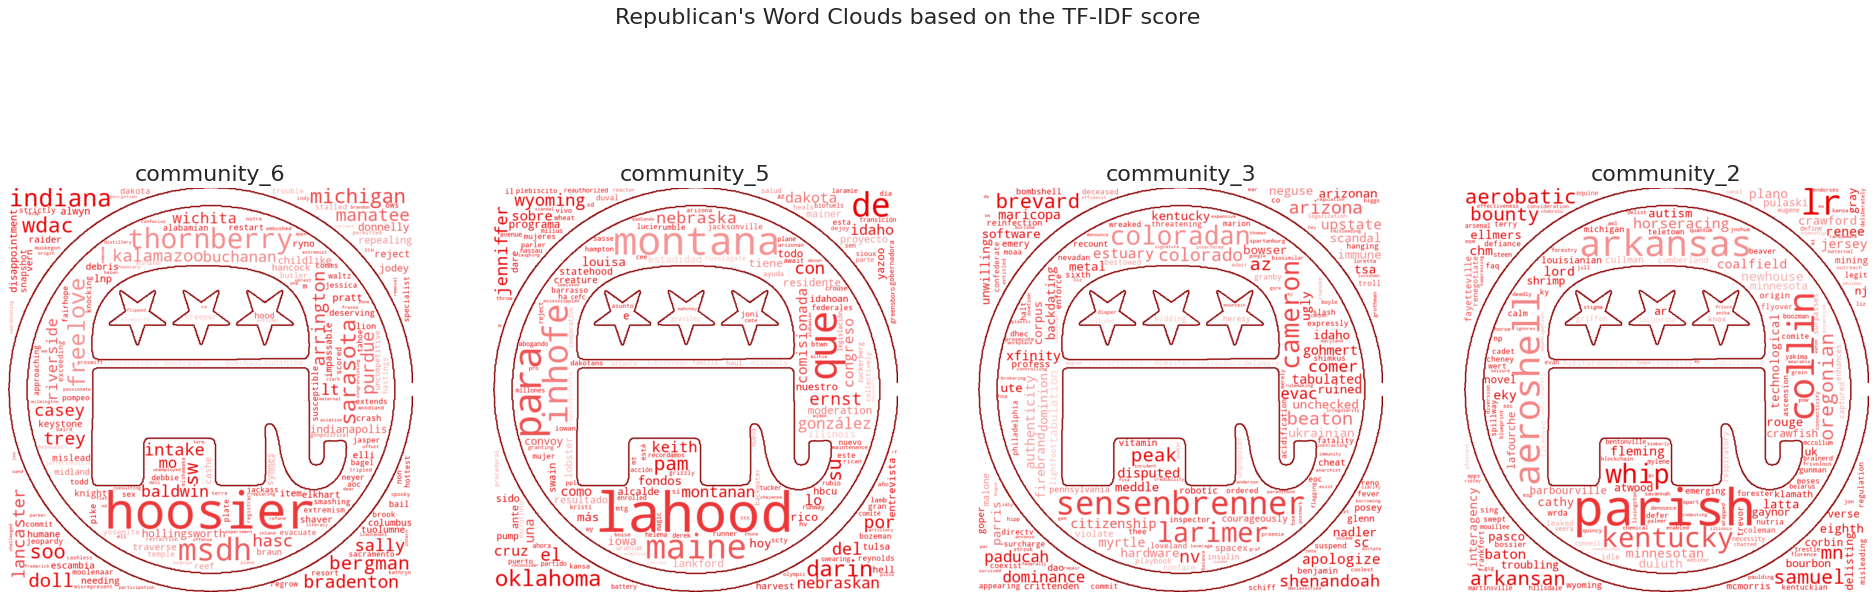

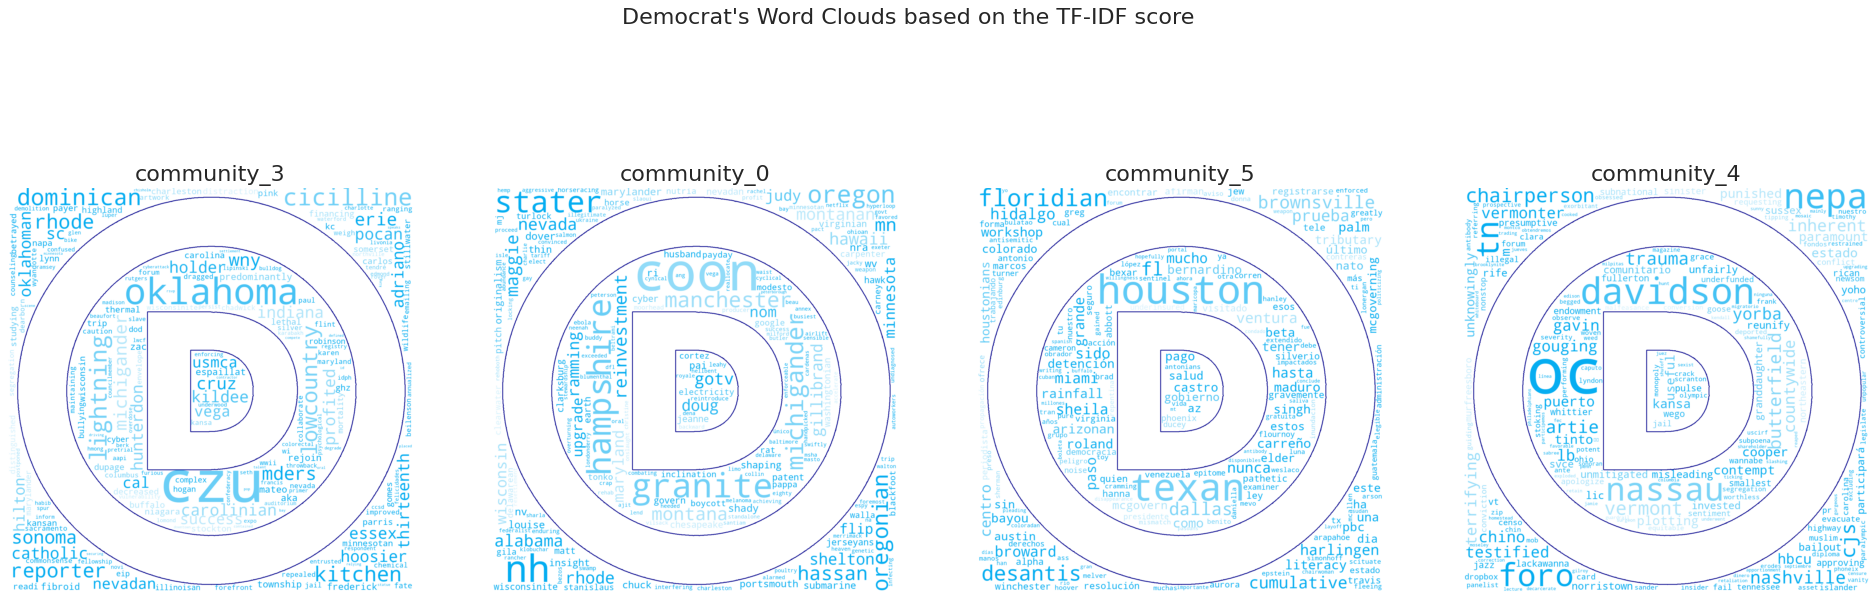

In [ ]:
largestcom_rep = largest_com(communitiesdict_rep)
largestcom_dem = largest_com(communitiesdict_dem)

alltokens_rep, tokenscom_rep, fdistcom_rep = fdist_tokens(largestcom_rep, Data)
alltokens_dem, tokenscom_dem, fdistcom_dem = fdist_tokens(largestcom_dem, Data)

idf_rep = idf(tokenscom_rep, alltokens_rep)
idf_dem = idf(tokenscom_dem, alltokens_dem)

tfidf_rep = tfidf(fdistcom_rep, idf_rep)
tfidf_dem = tfidf(fdistcom_dem, idf_dem)

comtxt_rep = com_string(tfidf_rep)
comtxt_dem = com_string(tfidf_dem)

com_figure(comtxt_rep, party="rep")
com_figure(comtxt_dem, party="dem")

In [ ]:
# # test = string_gen(tfidf_rep)
# tfidf_rep

Above we see the different 8 Wordclouds based on the different communities of the **Democrats** (4) and **Republicans** (4).

Starting from the **Republicans** we see that  

### 3.3 Core and Truss Decomposition

#### 3.3.1 K-Core Decomposition

In [ ]:
def decomposition_republican(GU_Republican, core=False, truss=False):
    if core:
        nodes = nx.k_core(GU_Republican, k=9).nodes()
    elif truss:
        nodes = nx.k_truss(GU_Republican, k=7).nodes()

    node_color = []
    for node in GU_Republican.nodes():
        if node in nodes:
            node_color.append("yellow")
        else:
            node_color.append("red")

    d = nx.degree(GU_Republican)
    sizes = [(d[node] + 1) * 5 for node in GU_Republican.nodes()]

    # Specify the settings for the Force Atlas 2 algorithm
    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        linLogMode=False,  # NOT IMPLEMENTED
        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
        edgeWeightInfluence=1.0,

        # Performance
        jitterTolerance=1.0,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=1.2,
        multiThreaded=False,  # NOT IMPLEMENTED

        # Tuning
        scalingRatio=2.0,
        strongGravityMode=False,
        gravity=5.0,

        # Log
        verbose=True)

    positions = forceatlas2.forceatlas2_networkx_layout(GU, pos=None, iterations=2000)

    plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')

    sns.set_style('whitegrid')
    sns.set_context('talk')

    # create legend
    plt.scatter([], [], c='yellow', alpha=0.7, s=100, label='Most Influential Republicans')
    plt.legend(scatterpoints=1, frameon=True, labelspacing=1)

    nx.draw_networkx_nodes(GU_Republican, positions, node_size=sizes, node_color=node_color, alpha=0.7)
    nx.draw_networkx_edges(GU_Republican, positions, edge_color="grey", alpha=0.08)
    ax = plt.gca()
    ax.collections[0].set_linewidth(0.1)
    ax.set_title('US House Republican Representatives of 2020 network', fontsize=16);
    plt.axis('off')
    plt.show()

    if truss:
        return nodes

#### 3.3.2 K-Truss Decomposition

In [ ]:
def decomposition_democrat(GU_Democrat, core=False, truss=False):
    if core:
        nodes = nx.k_core(GU_Democrat, k=12).nodes()
    elif truss:
        nodes = nx.k_truss(GU_Democrat, k=6).nodes()

    node_color = []
    for node in GU_Democrat.nodes():
        if node in nodes:
            node_color.append("yellow")
        else:
            node_color.append("blue")

    d = nx.degree(GU_Democrat)
    sizes = [(d[node] + 1) * 5 for node in GU_Democrat.nodes()]

    # Specify the settings for the Force Atlas 2 algorithm
    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        linLogMode=False,  # NOT IMPLEMENTED
        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
        edgeWeightInfluence=1.0,

        # Performance
        jitterTolerance=1.0,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=1.2,
        multiThreaded=False,  # NOT IMPLEMENTED

        # Tuning
        scalingRatio=2.0,
        strongGravityMode=False,
        gravity=5.0,

        # Log
        verbose=True)

    positions = forceatlas2.forceatlas2_networkx_layout(GU, pos=None, iterations=2000)

    plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')

    sns.set_style('whitegrid')
    sns.set_context('talk')

    # create legend
    plt.scatter([], [], c='yellow', alpha=0.7, s=100, label='Most Influential Democrats')
    plt.legend(scatterpoints=1, frameon=True, labelspacing=1)

    nx.draw_networkx_nodes(GU_Democrat, positions, node_size=sizes, node_color=node_color, alpha=0.7)
    nx.draw_networkx_edges(GU_Democrat, positions, edge_color="grey", alpha=0.08)
    ax = plt.gca()
    ax.collections[0].set_linewidth(0.1)
    ax.set_title('US House Democrat Representatives of 2020 network', fontsize=16);
    plt.axis('off')
    plt.show()

    if truss:
        return nodes

100%|██████████| 2000/2000 [00:05<00:00, 339.17it/s]
BarnesHut Approximation  took  1.87  seconds
Repulsion forces  took  3.33  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


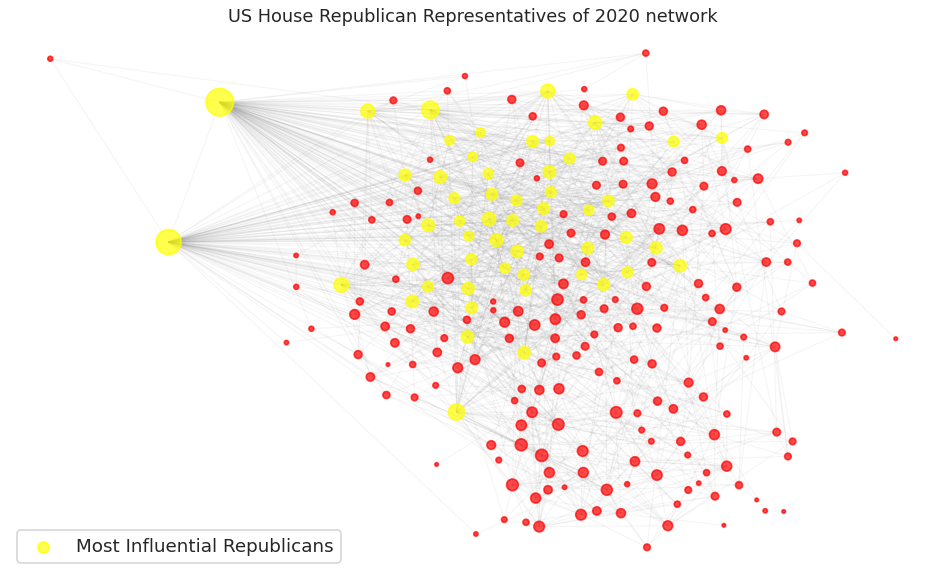

100%|██████████| 2000/2000 [00:05<00:00, 338.72it/s]
BarnesHut Approximation  took  1.88  seconds
Repulsion forces  took  3.30  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.15  seconds
AdjustSpeedAndApplyForces step  took  0.24  seconds


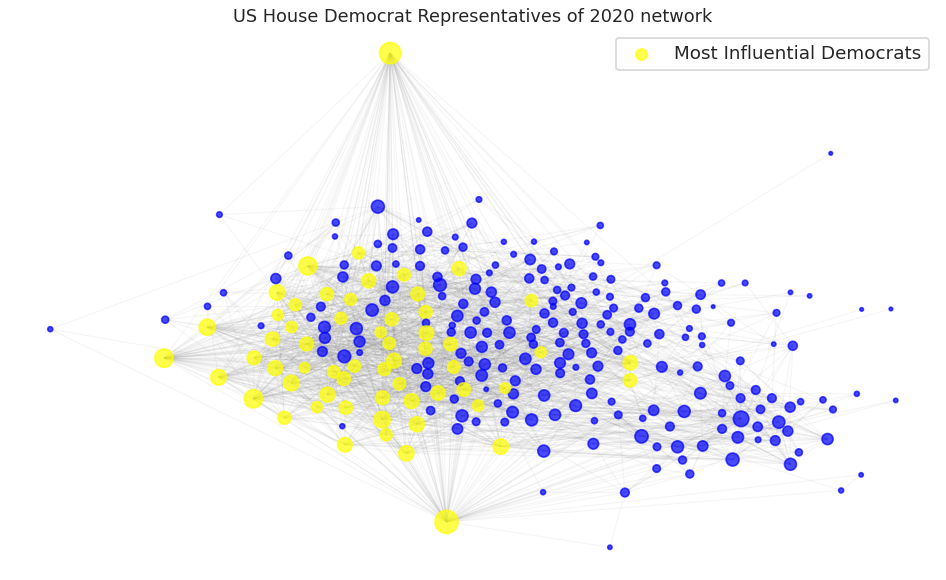

In [ ]:
 # core decomposition
decomposition_republican(GU_Republican, core=True)
decomposition_democrat(GU_Democrat, core=True)

100%|██████████| 2000/2000 [00:05<00:00, 352.01it/s]
BarnesHut Approximation  took  1.87  seconds
Repulsion forces  took  3.13  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.15  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


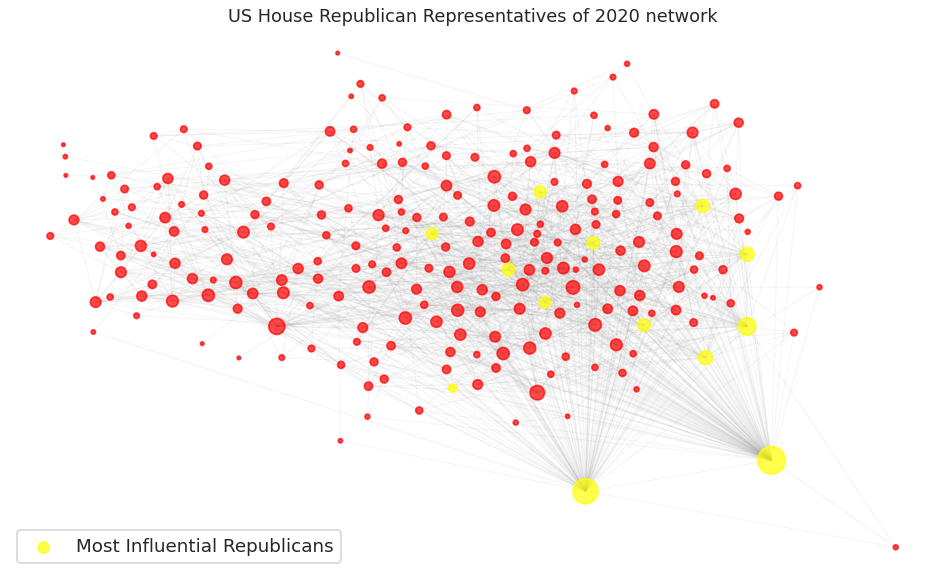

+------------------------------+
| Most Influential Republicans |
+------------------------------+
|       michaelcburgess        |
|         ConawayTX11          |
|         RepTomEmmer          |
|          RepMcCaul           |
|           boblatta           |
|       RepBradWenstrup        |
|         RepRonWright         |
|        RepKevinBrady         |
|        cathymcmorris         |
|          MacTXPress          |
|         SteveScalise         |
|        RepRichHudson         |
|          GOPLeader           |
+------------------------------+


In [ ]:
# truss decomposition
truss_nodes_r = decomposition_republican(GU_Republican, truss=True)

pt = prettytable.PrettyTable()
pt.add_column('Most Influential Republicans', list(truss_nodes_r.keys()))
print(pt)

100%|██████████| 2000/2000 [00:06<00:00, 316.52it/s]
BarnesHut Approximation  took  1.93  seconds
Repulsion forces  took  3.61  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  0.16  seconds
AdjustSpeedAndApplyForces step  took  0.25  seconds


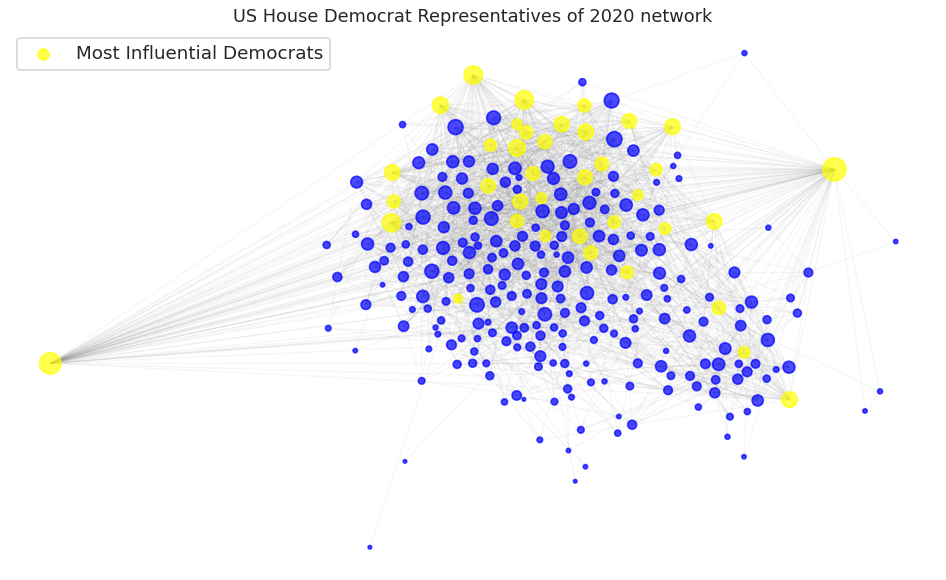

+----------------------------+
| Most Influential Democrats |
+----------------------------+
|        KamalaHarris        |
|       SpeakerPelosi        |
|      BennieGThompson       |
|        RepMcGovern         |
|       RepBarbaraLee        |
|        NormaJTorres        |
|        RepSusanWild        |
|      RepRaulGrijalva       |
|       RepChuyGarcia        |
|        RepPressley         |
|        repmarkpocan        |
|         RepMaloney         |
|        WhipClyburn         |
|        LeaderHoyer         |
|       SenatorDurbin        |
|         SenSchumer         |
|       SenatorBaldwin       |
|          RepDean           |
|           RepMGS           |
|        RepDonBeyer         |
|         RepKClark          |
|       GerryConnolly        |
|      JoaquinCastrotx       |
|      RepAnthonyBrown       |
|       RepDwightEvans       |
|         RepCasten          |
|         NitaLowey          |
|         RepSpeier          |
|       janschakowsky        |
|       

In [ ]:
truss_nodes_d = decomposition_democrat(GU_Democrat, truss=True)

pt = prettytable.PrettyTable()
pt.add_column('Most Influential Democrats', list(truss_nodes_d.keys()))
print(pt)

### 3.4  Analysis of communities and most influential

#### 3.4.1 Combining communities with k-truss influential nodes

In [ ]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos


def _position_communities(g, partition, **kwargs):
    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos


def _find_between_community_edges(g, partition):
    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges


def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [ ]:
def influential_com(GU, partition, truss_nodes, p):
    nodes = []
    for node in GU.nodes():
        if node not in truss_nodes:
            nodes.append(node)

    node_color = []
    for key, value in partition.items():
        if key not in truss_nodes:
            node_color.append(value)

    pos = community_layout(GU, partition)

    node_pos = {}
    truss_pos = {}
    for key, value in pos.items():
        if key in truss_nodes:
            truss_pos[key] = value
        else:
            node_pos[key] = value

    plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
    nx.draw_networkx_nodes(GU, node_pos, node_size=400, node_shape="o", cmap=plt.cm.RdYlBu, nodelist=nodes, node_color=node_color, alpha=0.8)
    nx.draw_networkx_nodes(GU, truss_pos, node_size=800, node_shape="*", node_color="black", nodelist=truss_nodes, alpha=0.8)
    nx.draw_networkx_edges(GU, pos, alpha=0.2, edge_color="grey")
    plt.axis('off')
    plt.show()
    """if p == "d":
        plt.savefig("./images/communities_democrat.png", format="PNG")
    elif p == "r":
        plt.savefig("./images/communities_republican.png", format="PNG")"""

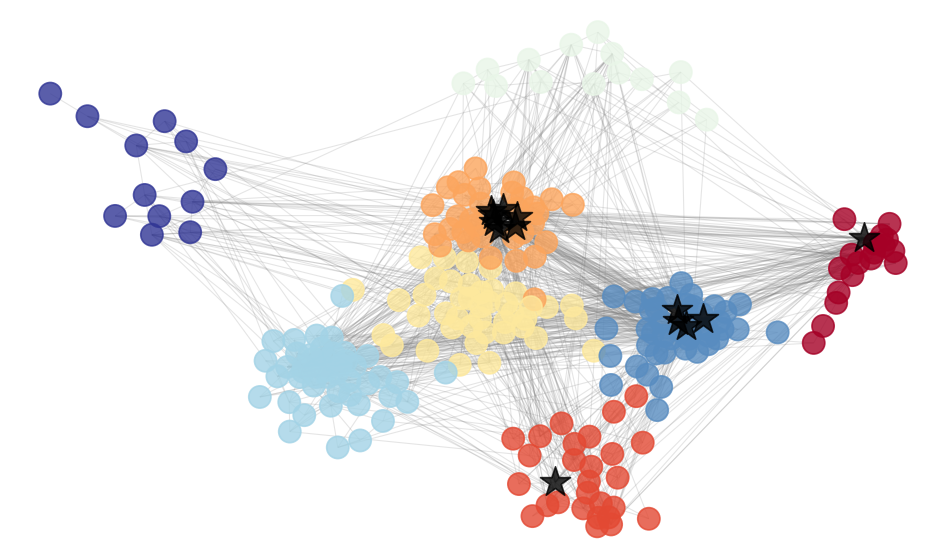

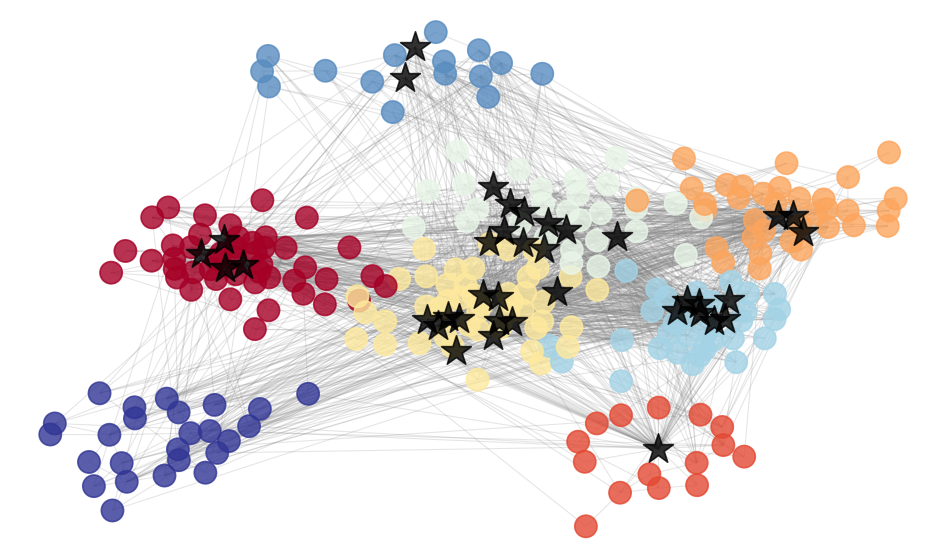

In [ ]:
influential_com(GU_Republican, partition_rep, truss_nodes_r, p="r")
influential_com(GU_Democrat, partition_dem, truss_nodes_d, p="d")

#### 3.4.2 Word Clouds of top candidates and their communities

We'll consider one Democrat representative and one Republican with the most influence based on our analysis and we will investigate any common patterns in their Tweets. From the previous presented lists we will select the following representatives:
* RepTomEmmer - *Republican Party*
* KamalaHarris - *Democrat Party*

In [ ]:
def fdist_tokens_inf(candidates, Data):
    fdist  = [] #list with the frequency distribution (term frequency) - the frequency of each token within each community
    tokens = {} #dictionary with the unique tokens each community has
    all_tokens = [] #list with all the unique tokens from all the communities

    for candidate in candidates:
        toks = [] #list which will contain the tokens of each community
        tokens[candidate] = {}
        words = (''.join(Data[Data['TwitterUsernames'] == candidate]["Tweets"])).split(' ')
        words = [w.lower() for w in words] #all characters are set to lower case
        words = [word for word in words if not word.startswith("@")]
        words = [word for word in words if not word in pun] #keep only the words which don't contain any of the listed punctuations
        words = [word for word in words if word.isalpha()] #keep the words which contain only alphabet letters
        words = [w for w in words if not w in stops] #removes the english stop words
        words = [w for w in words if not len(w) == 1] #removes the words which have length equal to 1
        for word in words: #loop through the list of words
            word = lemmatizer.lemmatize(word) #return the lemma of each word
            toks.append(word) #new entry in the tokens list which will be used for the frequency distribution
            all_tokens.append(word) #new entry the total token list
                    
        tokens[candidate] = set(toks) #add the unique list of tokens in each community
        
        fdist.append([candidate, nltk.FreqDist(toks)]) #add the community and the term frequency of each token
            
    all_tokens = set(all_tokens)

    return all_tokens, tokens, fdist

SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GOPLeader
SpeakerPelosi
GO

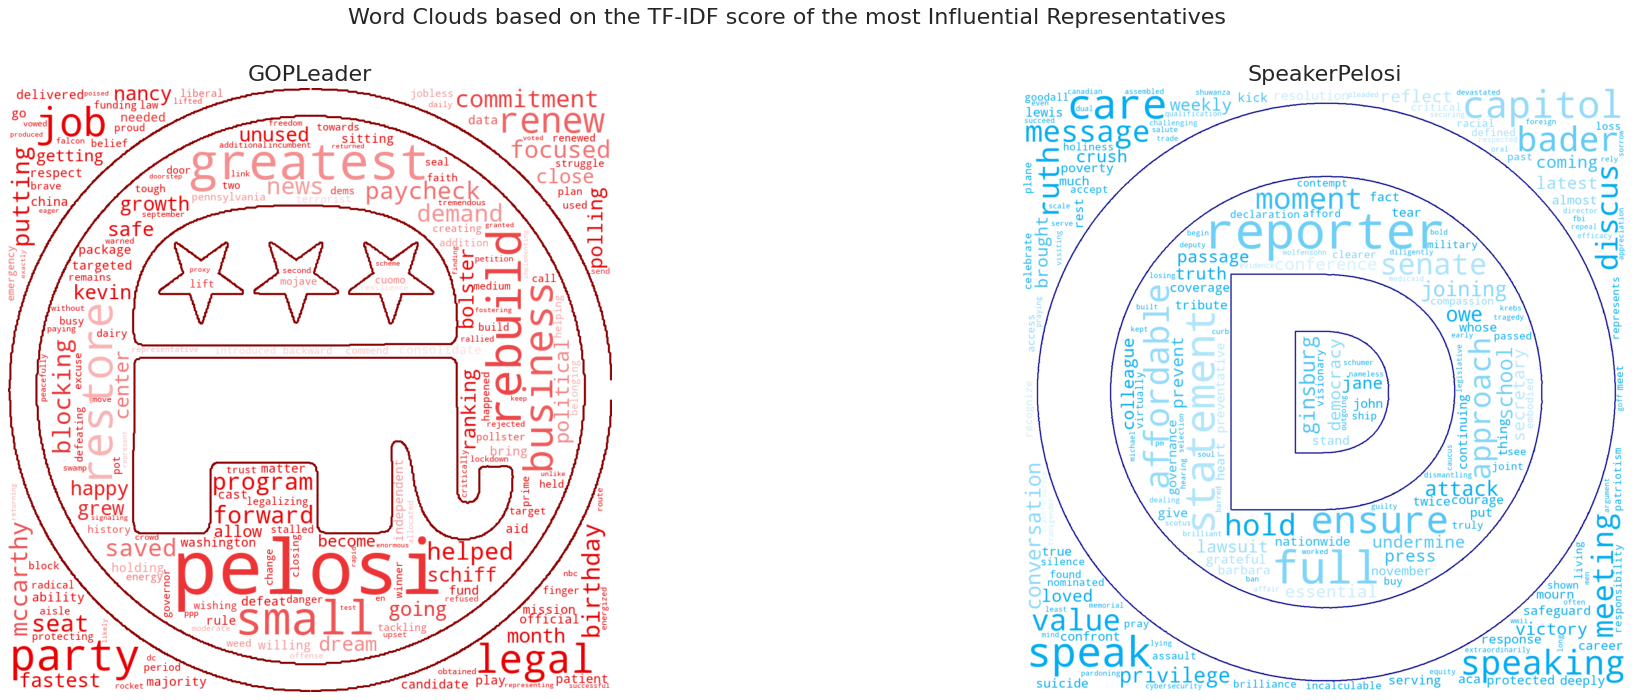

In [ ]:
candidates = ['GOPLeader', 'SpeakerPelosi']

alltokens, tokens, fdist = fdist_tokens_inf(candidates, Data)
idf_inf = idf(tokens, alltokens)

tfidf_inf = {} #dictionary in which we will have the token and the tfidf
for d in fdist: #loop through each community
    tfidf_inf[d[0]] = {}
    for token in d[1]: #loop through the tokens of the current community
        tfidfx = d[1][token] * idf_inf[token] #calculate the tfidf
        tfidf_inf[d[0]][token] = int(round(tfidfx)) #assign the rounded up to the nearest integer value

full_txt = com_string(tfidf_inf)

mask = [np.array(Image.open("./data/republican.png")), np.array(Image.open("./data/democrat.png"))]
color = ["darkred", "darkblue"]

fig = plt.figure(figsize=(30, 10), dpi=80)
i=1
for j, candidate in enumerate(candidates): #loop through each community
    wordcloud = WordCloud(background_color="white", mask=mask[j], contour_width=3, contour_color=color[j],
                max_font_size=3000, collocations = False)

    wordcloud.generate(full_txt[candidate])

    image_colors = ImageColorGenerator(mask[j])
    plt.subplot(1, 2, i).set_title(str(candidate), fontsize=20)
    plt.plot()
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    i+=1
fig.suptitle("Word Clouds based on the TF-IDF score of the most Influential Representatives", fontsize=20)
plt.show()

In [ ]:
for key,value in partition_rep.items():
    if key == candidates[0]:
        community_rep = value
        print(f"Republican {key} belongs to the community {value}\n")
  
for key,value in partition_dem.items():
    if key == candidates[1]:
        community_dem = value
        print(f"Democrat {key} belogns to the community {value}")

Republican GOPLeader belongs to the community 6

Democrat SpeakerPelosi belogns to the community 3


In [ ]:
# # for key, value in partition_rep.items():
# #     print(key, value)

# for key, value in partition_rep.items():
#     if value == 6:
#         if key != 'GOPLeader':
#             print(key)


In [ ]:
# for key, value in partition_dem.items():
#     if value == 3:
#         if key != 'SpeakerPelosi':
#             print(key)

Now let's make a list of the community of the two politicians that belong to, without them in order to analyse more about the community (without them).

In [ ]:
Republicans_com = []
Democrats_com = []

for key, value in partition_dem.items():
    if value == 3: #change this according to the communities our members belong to 
        if key != 'SpeakerPelosi':
            Democrats_com.append(key)

for key, value in partition_rep.items():
    if value == 6: #change this according to the communities our members belong to
        if key != 'GOPLeader':
            Republicans_com.append(key)

makedict = {}    
makedict = {
    '0' : Democrats_com,
    '1' : Republicans_com
}

In [ ]:
list(makedict.values())[0]

['RepDavids',
 'RepDebDingell',
 'DorisMatsui',
 'RepThompson',
 'RepSusanWild',
 'TulsiPress',
 'RepHuffman',
 'EleanorNorton',
 'repmarkpocan',
 'RepBillFoster',
 'RepMarkTakano',
 'WhipClyburn',
 'LeaderHoyer',
 'RepKarenBass',
 'RepUnderwood',
 'RepMalinowski',
 'RepDavidEPrice',
 'RepSpanberger',
 'RepMcNerney',
 'RepLawrence',
 'RepLoriTrahan',
 'RepBobbyRush',
 'FrankPallone',
 'RepDeSaulnier',
 'RepAnthonyBrown',
 'RepRobinKelly',
 'RepHoulahan',
 'RepCasten',
 'janschakowsky',
 'RepAnnaEshoo',
 'RepHankJohnson',
 'RepDavidTrone',
 'RepAdamSmith',
 'RepMikeQuigley',
 'RepHaleyStevens',
 'RepAndreCarson',
 'RepAdams',
 'BettyMcCollum04',
 'SanfordBishop',
 'RepJoeMorelle',
 'RepKendraHorn',
 'RepCunningham',
 'repdavidscott',
 'RepYvetteClarke',
 'USRepMikeDoyle',
 'repdinatitus',
 'RepGwenMoore',
 'RepLipinski',
 'RepDonaldPayne',
 'teammoulton',
 'RepDanKildee',
 'RepBrianHiggins',
 'EspaillatNY',
 'RepCicilline',
 'jimlangevin']

In [ ]:
def fdist_tokens_com(dictionary, Data): #rep_com, candidate
    fdist_com  = [] #list with the frequency distribution (term frequency) - the frequency of each token within each community
    tokens_com = {} #dictionary with the unique tokens each community has
    all_tokens = [] #list with all the unique tokens from all the communities

    tokens = []
    for i in list(dictionary.values())[0]: #loop through the largest communities
        com_name = 'community_0_dem' #assign to a variable the community name
        tokens_com[com_name] = {}
        words = (''.join(Data[Data['TwitterUsernames'] == i]["Tweets"])).split(' ')
        words = [w.lower() for w in words] #all characters are set to lower case
        words = [word for word in words if not word.startswith("@")]
        words = [word for word in words if not word in pun] #keep only the words which don't contain any of the listed punctuations
        words = [word for word in words if word.isalpha()] #keep the words which contain only alphabet letters
        words = [w for w in words if not w in stops] #removes the english stop words
        words = [w for w in words if not len(w) == 1] #removes the words which have length equal to 1
        for word in words: #loop through the list of words
            word = lemmatizer.lemmatize(word) #return the lemma of each word
            tokens.append(word) #new entry in the tokens list which will be used for the frequency distribution
            all_tokens.append(word) #new entry the total token list
                                
        tokens_com[com_name] = set(tokens) #add the unique list of tokens in each community        
        fdist_com.append([com_name, nltk.FreqDist(tokens)]) #add the community and the term frequency of each token

    tokens = [] #list which will contain the tokens of each community
    for i in list(dictionary.values())[1]: #loop through the largest communities
        com_name = 'community_0_rep' #assign to a variable the community name
        tokens_com[com_name] = {}
        words = (''.join(Data[Data['TwitterUsernames'] == i]["Tweets"])).split(' ')
        words = [w.lower() for w in words] #all characters are set to lower case
        words = [word for word in words if not word.startswith("@")]
        words = [word for word in words if not word in pun] #keep only the words which don't contain any of the listed punctuations
        words = [word for word in words if word.isalpha()] #keep the words which contain only alphabet letters
        words = [w for w in words if not w in stops] #removes the english stop words
        words = [w for w in words if not len(w) == 1] #removes the words which have length equal to 1
        for word in words: #loop through the list of words
            word = lemmatizer.lemmatize(word) #return the lemma of each word
            tokens.append(word) #new entry in the tokens list which will be used for the frequency distribution
            all_tokens.append(word) #new entry the total token list
                                
        tokens_com[com_name] = set(tokens) #add the unique list of tokens in each community        
        fdist_com.append([com_name, nltk.FreqDist(tokens)]) #add the community and the term frequency of each token    

    # for key, value in partition.items(): #loop through the largest communities
    #     if value == rep_com:
    #         com_name = 'community_'+str(value) #assign to a variable the community name
    #         tokens = [] #list which will contain the tokens of each community
    #         tokens_com[com_name] = {}
    #         if key != candidate:
    #             words = (''.join(Data[Data['TwitterUsernames'] == key]["Tweets"])).split(' ')
    #             #print(words)
    #             words = [w.lower() for w in words] #all characters are set to lower case
    #             words = [word for word in words if not word.startswith("@")]
    #             words = [word for word in words if not word in pun] #keep only the words which don't contain any of the listed punctuations
    #             words = [word for word in words if word.isalpha()] #keep the words which contain only alphabet letters
    #             words = [w for w in words if not w in stops] #removes the english stop words
    #             words = [w for w in words if not len(w) == 1] #removes the words which have length equal to 1
    #             for word in words: #loop through the list of words
    #                 #print(word)
    #                 word = lemmatizer.lemmatize(word) #return the lemma of each word
    #                 tokens.append(word) #new entry in the tokens list which will be used for the frequency distribution
    #                 all_tokens.append(word) #new entry the total token list
                        
    #         tokens_com[com_name] = set(tokens) #add the unique list of tokens in each community
            
    #         fdist_com.append([com_name, nltk.FreqDist(tokens)]) #add the community and the term frequency of each token
                
    all_tokens = set(all_tokens) #keep the unique tokens
    print(all_tokens)
    return all_tokens, tokens_com, fdist_com

In [ ]:
# def idf_com(tokens_com, all_tokens):
#     N = len(tokens_com) #total number of communities
#     idf = {} #dictionary in which we will have the IDF value for each token

#     for token in all_tokens: #loop through all unique tokens
#         count = 0
#         for key in tokens_com.keys(): #loop through each community
#             if [val for val in tokens_com[key]].count(token) > 0: #if the token appears more than once in the current community 
#                 count += 1 #the count value will be increased by 1
#                 continue
            
#         idf[token] = math.log(N/(count+1)+1) #idf computation based on the above mentioned equation

#     return idf

community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
community_0_rep
community_0_dem
communit

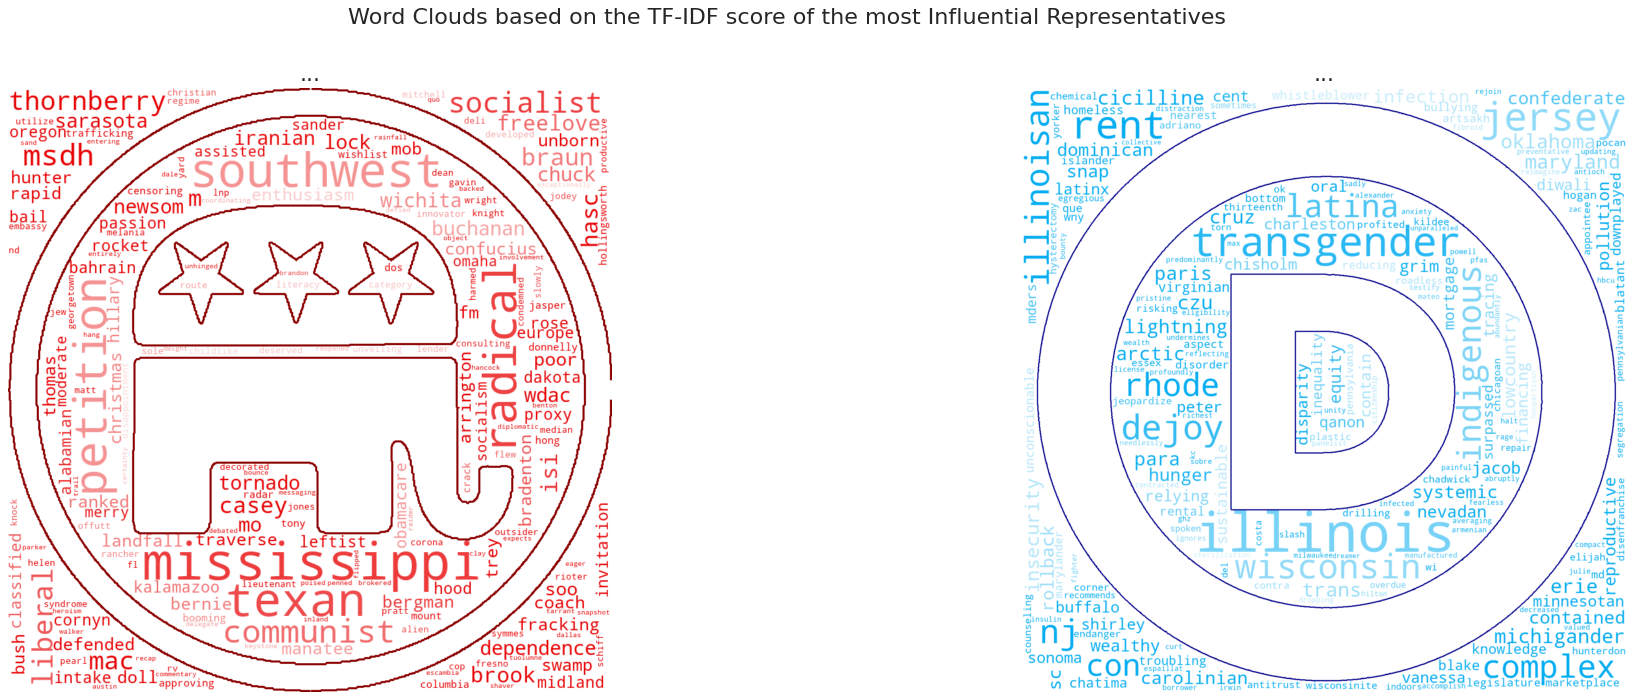

In [ ]:
# com = ['community_3', 'community_0']

alltoks_c, toks_c, fdist_c = fdist_tokens_com(makedict, Data)
#alltoks_d, toks_d, fdist_d = fdist_tokens_com(makedict, Data)

idf_c = idf(toks_r, alltoks_r)
#idf_d = idf(toks_d, alltoks_d)

tfidf_c = tfidf(fdist_c, idf_c)
#tfidf_d = tfidf(fdist_d, idf_d)

fulltxt_c = com_string(tfidf_c)
#fulltxt_d = com_string(tfidf_d)
# fulltxt = [fulltxt_r['community_3'], fulltxt_d['community_0']]

mask = [np.array(Image.open("./data/republican.png")), np.array(Image.open("./data/democrat.png"))]
fig = plt.figure(figsize=(30, 10), dpi=80)
for community in fulltxt_c: #loop through each community
    if community == 'community_0_rep':
      wordcloud = WordCloud(background_color="white", mask=mask[0], contour_width=3, contour_color='darkred',
                max_font_size=3000, collocations = False).generate(fulltxt_c[community])
    #   plt.figure()
      image_colors = ImageColorGenerator(mask[0])
      plt.subplot(1, 2, 1).set_title("...", fontsize=20)
      #plt.title("Community Score of Kevin McCarthy")
      plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
      plt.axis("off")
    #   plt.show()
    else:
      wordcloud = WordCloud(background_color="white", mask=mask[1], contour_width=3, contour_color='darkblue',
                max_font_size=3000, collocations = False).generate(fulltxt_c[community])
    #   plt.figure()
      image_colors = ImageColorGenerator(mask[1])
      plt.subplot(1, 2, 2).set_title("...", fontsize=20)
      #plt.title("Community Score of Nancy Pelosi")
      plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
      plt.axis("off")
    #   plt.show()
    
fig.suptitle("Word Clouds based on the TF-IDF score of the most Influential Representatives", fontsize=20)
plt.show()



# mask = [np.array(Image.open("./data/republican.png")), np.array(Image.open("./data/democrat.png"))]
# color = ["darkred", "darkblue"]

# fig = plt.figure(figsize=(30, 10), dpi=80)
# i=1
# for j in range(2): #loop through each community
#     wordcloud = WordCloud(background_color="white", mask=mask[j], contour_width=3, contour_color=color[j],
#                 max_font_size=3000, collocations = False)

#     wordcloud.generate(fulltxt[j])

#     image_colors = ImageColorGenerator(mask[j])
#     plt.subplot(1, 2, i).set_title("...", fontsize=20)
#     plt.plot()
#     plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
#     plt.axis("off")
#     i+=1
# fig.suptitle("Word Clouds based on the TF-IDF score of the most Influential Representatives", fontsize=20)
# plt.show()

### 3.5 Sentiment Analysis (Idriss writes here)

## 4. Discussion

### 4.1 What when well

### 4.2 What is still missing? What could be improved?, Why?

## 5. Contribution 

* Electra Zarafeta - s202238:   

        A. 2.1 - Twitter Scraper (Account organization, Dataset fetching/storing)  
        B. 2.3 - Basic Stats (In/Out degree distribution, Per party Nodes/Edges histogram, ForceAtlas coloured dataset graph)  
        C. Tools,Theory and Analysis: 3.1 - TF-TR wordclouds, 3.3 - Core/Truss Decomposition Analysis, 3.4.1 - Combining communities with k-truss influential nodes   
        D. Contribution on website creation  
        E. Contribution on code organization and commenting

* Asterios Nastas - s202242:

        A. Part A | 3 minute movie creation  
        B. 1 | Motivation
        C. 3.2 | Communities and TF-IDF Analysis
        D. 3.4 | Analysis of the most influential and their communities
        E. Contribution on website creation
        F. Contribution on code organization and commenting

* Idriss El Quassimi - s: 

        A.
        B.

#### References: 
\[1] https://triagecancer.org/congressional-social-media  
\[2] https://en.wikipedia.org/wiki/2020_United_States_House_of_Representatives_elections  
\[3] https://ballotpedia.org/United_States_House_of_Representatives_elections,_2020  
\[4] https://www.nytimes.com/interactive/2020/11/03/us/elections/results-senate.html  